In [273]:
import re
import pandas as pd
import seaborn as sns
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

sns.set()

In [274]:
fipe =  pd.read_csv('fipe.csv')

In [275]:
fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115395 entries, 0 to 115394
Data columns (total 7 columns):
Unnamed: 0       115395 non-null int64
AnoModelo        115395 non-null int64
Combustivel      115395 non-null object
Marca            115395 non-null object
MesReferencia    115395 non-null object
Modelo           115395 non-null object
Valor            115395 non-null object
dtypes: int64(2), object(5)
memory usage: 6.2+ MB


In [276]:
fipe.drop(columns=['Unnamed: 0'],inplace=True)

In [277]:
fipe['Valor'] = fipe['Valor'].apply(lambda x :re.search(r'[\d.]+',x.split(',')[0]).group().replace('.','')).astype(float)

In [278]:
fipe['Ano'] = fipe['MesReferencia'].apply(lambda x: x.split('-')[0])
fipe['Mes'] = fipe['MesReferencia'].apply(lambda x: x.split('-')[1])

fipe.drop(columns=['CodFipe','DataConsulta'], inplace=True)

In [279]:
fipe.sample(5)

,AnoModelo,Combustivel,Marca,MesReferencia,Modelo,Valor,Ano,Mes
74593,2018,Gasolina,Mercedes-Benz,2017-09,Classe A 200 1.6 TB/Flex Aut.,128962.0,2017,09
9603,2016,Gasolina,Citroën,2016-07,C4 LOUNGE Tendance 2.0 Flex 4p Mec.,62915.0,2016,07
4712,2016,Gasolina,Audi,2017-06,Q5 2.0 16V TFSI 225cv Quattro Tiptronic,177778.0,2017,06
15173,2016,Gasolina,Fiat,2019-06,Palio Weekend Adv. Ext. 1.8 Flex,48827.0,2019,06
81075,2018,Diesel,VW - VolksWagen,2018-09,AMAROK SE CD 2.0 16V TDI 4x4 Diesel,116844.0,2018,09


In [280]:
fipe_carro = fipe.query(" Valor < 500000")

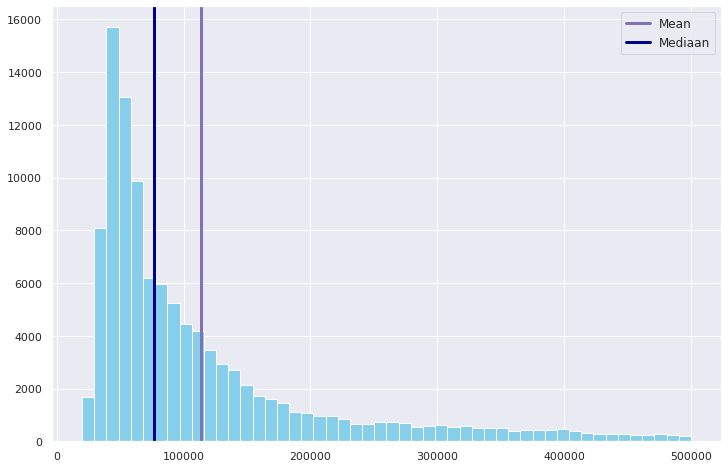

In [281]:
fig = plt.figure(figsize=(12,8))
plt.hist(fipe_carro.Valor , bins=50, color='skyblue')
plt.axvline(fipe_carro.Valor.mean() , color='m', lw=3 , label ='Mean');
plt.axvline(fipe_carro.Valor.median() , color='darkblue' , lw=3, label ='Mediaan');
plt.legend(fontsize=12);

In [282]:
por_marca = fipe_carro.groupby('Marca')['Valor'].mean().sort_values(ascending=False)

In [283]:
# marcas com media de preço mais altas e mais baixas
top10_caros= por_marca[:20]
top10_baratos = por_marca[-20:][::-1]

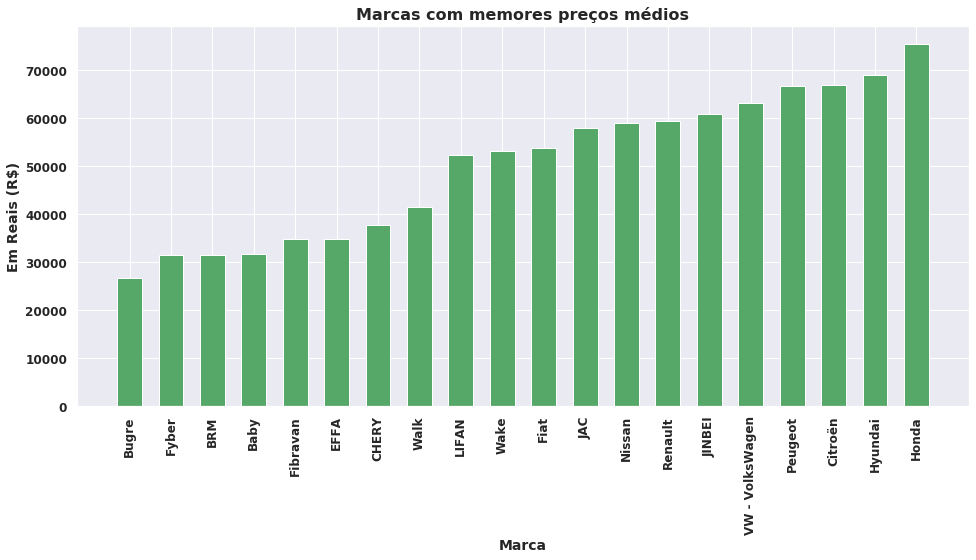

In [284]:
# plot
fig, ax = plt.subplots(figsize=(16,7));

ax.bar(top10_baratos.index,top10_baratos.values,color='g', width=0.6)

plt.xlabel('Marca', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('Em Reais (R$)', {'weight':'bold', 'fontsize': 14  })

plt.xticks( rotation='vertical' , fontsize=12, weight='bold');
plt.yticks(fontsize=12, weight='bold');
plt.title("Marcas com memores preços médios", fontsize=16, weight='bold');

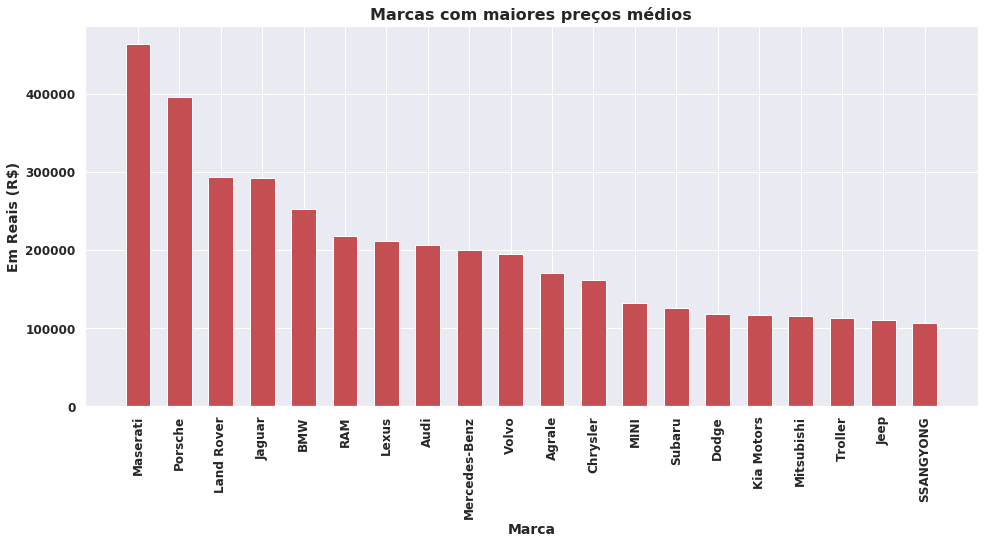

In [285]:
# plot
fig, ax = plt.subplots(figsize=(16,7));

ax.bar(top10_caros.index,top10_caros.values,color='r', width=0.6)

plt.xlabel('Marca', {'weight':'bold', 'fontsize': 14 })
plt.ylabel('Em Reais (R$)', {'weight':'bold', 'fontsize': 14  })

plt.xticks( rotation='vertical' , fontsize=12, weight='bold');
plt.yticks(fontsize=12, weight='bold');
plt.title("Marcas com maiores preços médios", fontsize=16, weight='bold');

# valor de depreciação  medio???

In [286]:
def plot_charts(df, cor='blue'):
    fig, axes = plt.subplots(1, len(df.AnoModelo.value_counts().index.sort_values()), figsize=(28,8))

    for i,ano in enumerate(df.AnoModelo.value_counts().index.sort_values()):
        aux = df.query(" AnoModelo =='{}'".format(ano)).sort_values(['AnoModelo','Ano','Mes'])
        axes[i].plot(aux.Valor.values , color=cor, label='Reais(R$)')
        axes[i].set_title("{}-{} ".format(aux.Modelo.values[0][:-9],ano), fontsize=12, weight='bold');

        axes[i].set_xticks(range(len(aux.MesReferencia.values)))
        axes[i].set_xticklabels(aux.MesReferencia.values,rotation=90, fontsize=12, weight='bold')
        axes[i].yaxis.set_tick_params(labelsize=12)

    plt.legend(fontsize=14);

In [287]:
global mais_vendidos

mais_vendidos=['Onix','HB20','Ka','Ka Sedan','Gol','Sandero','Prisma','Corolla','Mobi','Compass',\
              'HR-V','Fox','Etios','Voyage','Creta','Uno','Renegade','Up','Kicks','Siena','Kwid','Fit']

In [288]:
def populares(row):
    count=0
    for m in mais_vendidos:
        try:
            re.search(r'[\s]*{}[\s]'.format(m.lower()), row.lower()).group()
        except:
            pass
        else:
            count+=1
            break
        
    if count !=0:
        return 1
    else:
        return 0

In [289]:
fipe_carro_recente=fipe_carro.query("Ano=='2017' or Ano=='2018' or Ano=='2019' ").copy()

In [290]:
fipe_carro_recente['Popular'] = fipe_carro_recente['Modelo'].apply(lambda m: populares(m))

In [291]:
fipe_carro_recente = fipe_carro_recente.query("Popular==1 and (AnoModelo=='2017' or AnoModelo=='2018' or AnoModelo=='2019')")

In [292]:
fipe_carro_recente.Modelo.value_counts()[:60]

Grand Siena ATTRACTIVE 1.0 Flex 8V 4p       86
MOBI DRIVE 1.0 Flex 6V 5p                   86
MOBI WAY 1.0 Fire Flex 5p.                  86
Grand Siena ATTRAC. 1.4 EVO F.Flex 8V       86
MOBI LIKE 1.0 Fire Flex 5p.                 86
MOBI EASY 1.0 Fire Flex 5p.                 86
Ka 1.0 SE/SE Plus TiVCT Flex 5p             86
PRISMA Sed. LT 1.4 8V FlexPower 4p Aut.     85
PRISMA Sed. LTZ 1.4 8V FlexPower 4p Aut.    85
PRISMA Sed. LT 1.4 8V FlexPower 4p          85
S10 P-Up H.Country 2.8 4x4 CD Dies.Aut.     85
S10 Pick-Up LT 2.8 TDI 4x4 CD Diesel Aut    85
ONIX HATCH LT 1.0 8V FlexPower 5p Mec.      85
ONIX HATCH LT 1.4 8V FlexPower 5p Aut.      85
S10 Pick-Up LTZ 2.8 TDI 4x4 CD Dies.Aut     85
ONIX HATCH ACTIV 1.4 8V Flex 5P Aut.        85
ONIX HATCH LTZ 1.4 8V FlexPower 5p Mec.     85
ONIX HATCH LTZ 1.4 8V FlexPower 5p Aut.     85
ONIX HATCH ACTIV 1.4 8V Flex 5p Mec.        85
ONIX HATCH LT 1.4 8V FlexPower 5p Mec.      85
ETIOS PLATINUM 1.5 Flex 16V 4p Aut.         84
ETIOS X 1.3 F

# -------------------------------------------------------------------------------

In [293]:
carros = ['MOBI WAY 1.0 Fire Flex 5p.','Grand Siena ATTRACTIVE 1.0 Flex 8V 4p','Ka 1.0 SE/SE Plus TiVCT Flex 5p',\
            'ONIX HATCH LT 1.4 8V FlexPower 5p Mec.','S10 P-Up H.Country 2.8 4x4 CD Dies.Aut.','SANDERO Expression Flex 1.0 12V 5p',\
            'SANDERO STEPWAY Flex 1.6 16V 5p','Corolla XEi 2.0 Flex 16V Aut.','HB20 C.Style/C.Plus 1.6 Flex 16V Aut.',\
            'KICKS SL 1.6 16V FlexStar 5p Aut.','ETIOS X 1.3 Flex 16V 5p Aut.','ETIOS XLS Sedan 1.5 Flex 16V 4p Aut.',\
            'Creta Prestige 2.0 16V Flex Aut.','HR-V LX 1.8 Flexone 16V 5p Aut.','Fit LX 1.5 Flexone 16V 5p Aut.',\
            'COMPASS LIMITED 2.0 4x2 Flex 16V Aut.','Renegade Trailhawk 2.0 4x4 TB Diesel Aut']

carros = ['Ka 1.0 SE/SE Plus TiVCT Flex 5p','Corolla XEi 2.0 Flex 16V Aut.','S10 Pick-Up LTZ 2.8 TDI 4x4 CD Dies.Aut', \
          'ETIOS X Sedan 1.5 Flex 16V 4p Mec.','SANDERO SPORT RS 2.0 Flex 16V 5p','ONIX HATCH LTZ 1.4 8V FlexPower 5p Mec.', \
          'PRISMA Sed. LTZ 1.4 8V FlexPower 4p','HB20 R spec 1.6 Flex 16V Aut.','HR-V LX 1.8 Flexone 16V 5p Aut.', \
          'Renegade Longitude 1.8 4x2 Flex 16V Aut.','MOBI WAY 1.0 Fire Flex 5p.','Grand Siena ATTRAC. 1.4 EVO F.Flex 8V'
         ]

In [294]:
#PLOTS 
#---------------------------------------------------------------------------------------------

In [295]:
mobi_ = fipe_carro_recente.query(" Modelo == '{}'".format(carros[0])).sort_values(['AnoModelo','Ano','Mes'])
mobi_ = mobi_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

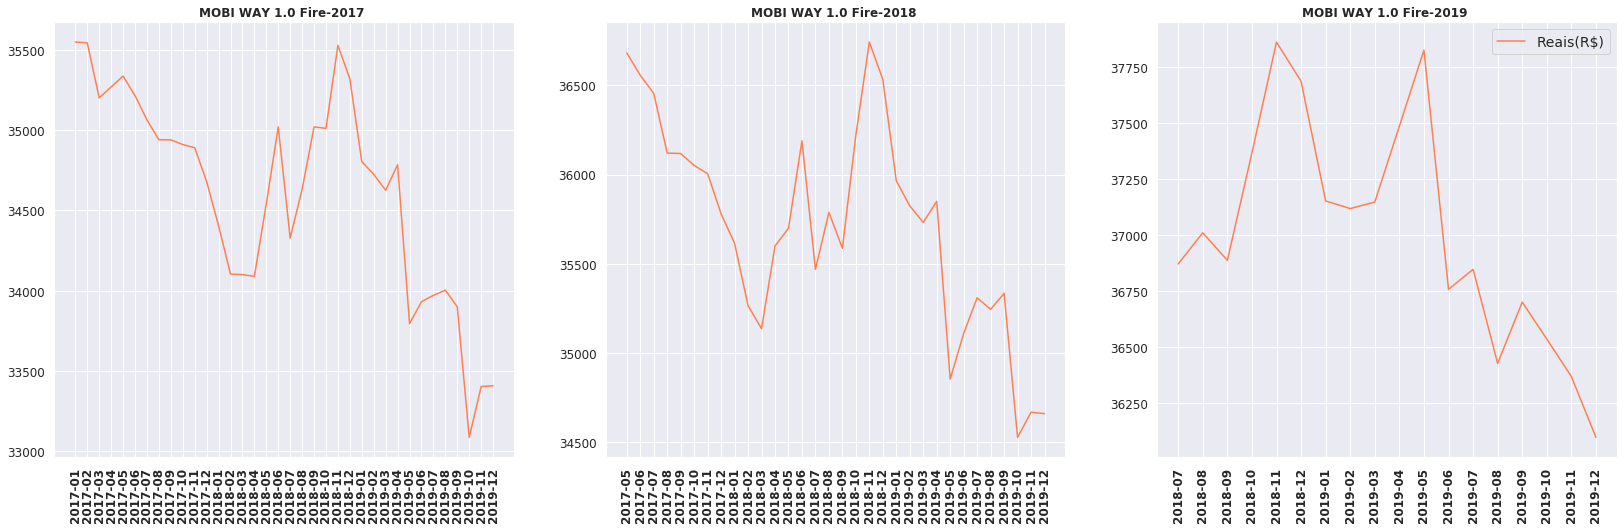

In [296]:
plot_charts(mobi_, 'coral')

# --------------------------------------------------------------------------------

In [297]:
ka_ =fipe_carro_recente.query(" Modelo == '{}'".format(carros[2])).sort_values(['AnoModelo','Ano','Mes'])
ka_ = ka_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

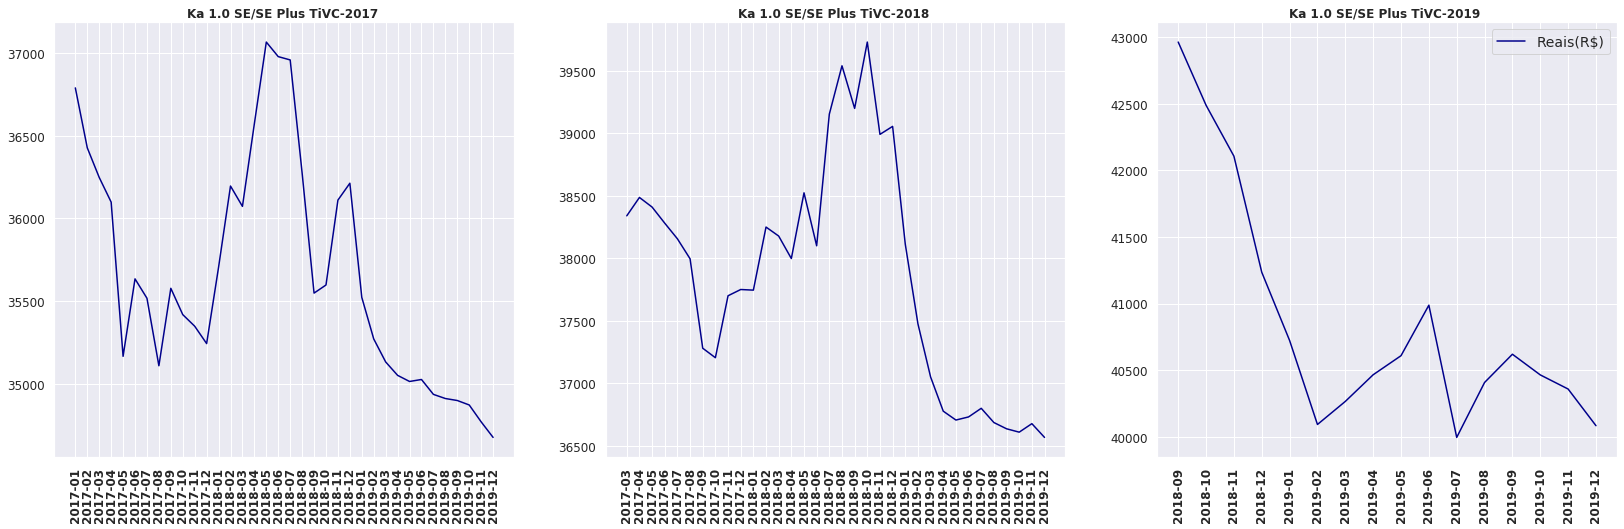

In [298]:
plot_charts(ka_,'darkblue')

# --------------------------------------------------------------------------------

In [299]:
onix_ = fipe_carro_recente.query(" Modelo == '{}'".format(carros[3])).sort_values(['AnoModelo','Ano','Mes'])
onix_ = onix_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

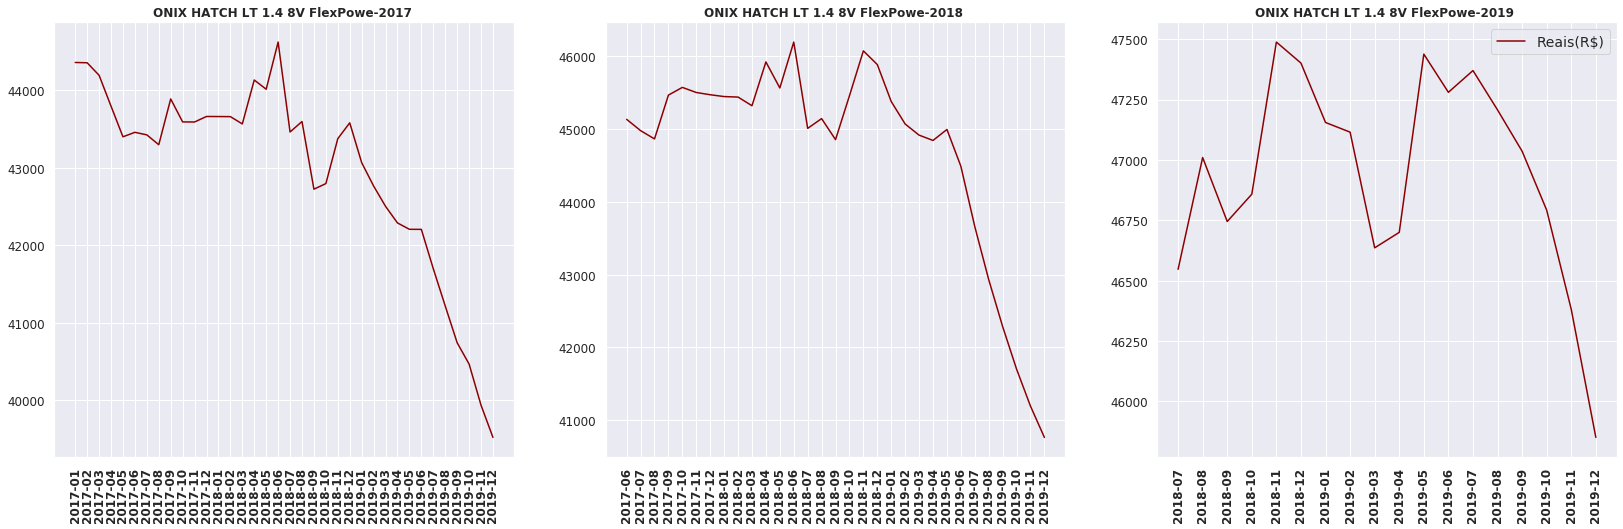

In [300]:
plot_charts(onix_,'darkred')

# --------------------------------------------------------------------------------

In [301]:
hb20_ = fipe_carro_recente.query(" Modelo == '{}'".format(carros[8])).sort_values(['AnoModelo','Ano','Mes'])
hb20_ = hb20_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

In [ ]:
plot_charts(hb20_,'green')

# --------------------------------------------------------------------------------

In [ ]:
renegade_ = fipe_carro_recente.query(" Modelo == '{}'".format(carros[16])).sort_values(['AnoModelo','Ano','Mes'])
renegade_ = renegade_.astype({"AnoModelo": int ,"Ano": int, "Mes": int})

In [ ]:
plot_charts(renegade_,'k')

In [ ]:
# depreciacao nos ultimos 12 meses
deprec = {}

for modelo in carros:
    diff = []
    aux = fipe_carro_recente.query(" Modelo == '{}'".format(modelo)).sort_values(['AnoModelo','Ano','Mes'])
    anomodelo = aux.AnoModelo.unique()
    for ano in anomodelo:
        aux2 = aux.query("AnoModelo  =='{}'".format(ano))
        primeiro = aux2.iloc[-12].Valor if aux2.shape[0]>=12 else aux2.iloc[0].Valor
        ultimo = aux2.iloc[-1].Valor
        diff.append(ultimo - primeiro)
    
    deprec[modelo]=diff

In [ ]:
df = pd.DataFrame(deprec)

In [ ]:
df = df.transpose()

In [ ]:
df.columns = ['modelo 2017','modelo 2018','modelo 2019'] # ano modelo

In [ ]:
df

In [ ]:
# depreciacao de cada ano modelo
df.plot(kind='barh', figsize=(16,13), title='DEPRECIAÇÃO DOS ULTIMOS 12 MESES DE CADA ANOMODELO', cmap='summer_r', fontsize=13);

In [ ]:
#depreciaçao media
df.mean(axis=1).plot(kind='barh', figsize=(16,10), title='DEPRECIAÇÃO MÉDIA DE CADA MODELO(2017,2018,2019)', cmap='cool', fontsize=13);

# Valor do carro tem relação com o valor de depreciação??

In [ ]:
media=[ round(fipe_carro_recente.query("Modelo == '{}'".format(m)).Valor.mean(),2) for m in df.index ]

In [ ]:
df['ValorMedio']=media

In [ ]:
df['MediaDepreciacao'] = [round(x,2) for x in df[df.columns[:-1]].mean(axis=1).values]

In [ ]:
df

In [ ]:
comp = df.sort_values(by='ValorMedio')

In [ ]:
colors = plt.cm.get_cmap('tab20')
colors = colors(np.linspace(0, 1, df.shape[0]))

fig, ax = plt.subplots(figsize=(12,8));

i=0
for r,row in df.iterrows():
    ax.scatter( row.ValorMedio , row.MediaDepreciacao ,  label=' '.join(r.split()[:3] ) , s=100 , color=colors[i])
    i+=1

ax.yaxis.get_offset_text().set_fontsize(14)
ax.xaxis.get_offset_text().set_fontsize(14)

ax.set_xlabel('Valor Medio' ,{'fontsize': 14 })
ax.set_ylabel('Média Depreciação', {'fontsize': 14  })

fig.tight_layout();
plt.gca().invert_yaxis();
plt.legend(fontsize=12, prop={'weight':'bold'});
plt.title("Relação entre valor do carro e média de depreciação", fontsize=15);

comp.plot(kind='scatter', x='ValorMedio', y='MediaDepreciacao', figsize=(12,8), title='RELAÇÃO ENTRE VALOR E DEPRECIAÇÃO', c='blue', s=50, fontsize=14);
plt.gca().invert_yaxis()

In [ ]:
comp.corr()

In [ ]:
cor = pd.DataFrame(np.triu(comp.corr()))
cor.columns = comp.corr().columns
cor.index = comp.corr().index

In [ ]:
cor = cor.replace(0.,np.nan)

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap='inferno');
plt.title('Matriz de correlação entre features' ,fontsize=15)
plt.yticks(rotation=0);